In [1]:
import keras
import numpy
import pandas as pd
from keras.metrics import binary_accuracy
from keras.models import Sequential
from keras.layers import Dense,Dropout
import numpy as np
from keras.optimizers import sgd, rmsprop, adam
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn import preprocessing
from sklearn.datasets import make_regression
from keras.wrappers.scikit_learn import KerasRegressor
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
import tensorflow as tf
from sklearn.model_selection import train_test_split 
# fix random seed for reproducibility

Using TensorFlow backend.


# Fonctionnement du MLP

## Perceptron Simple

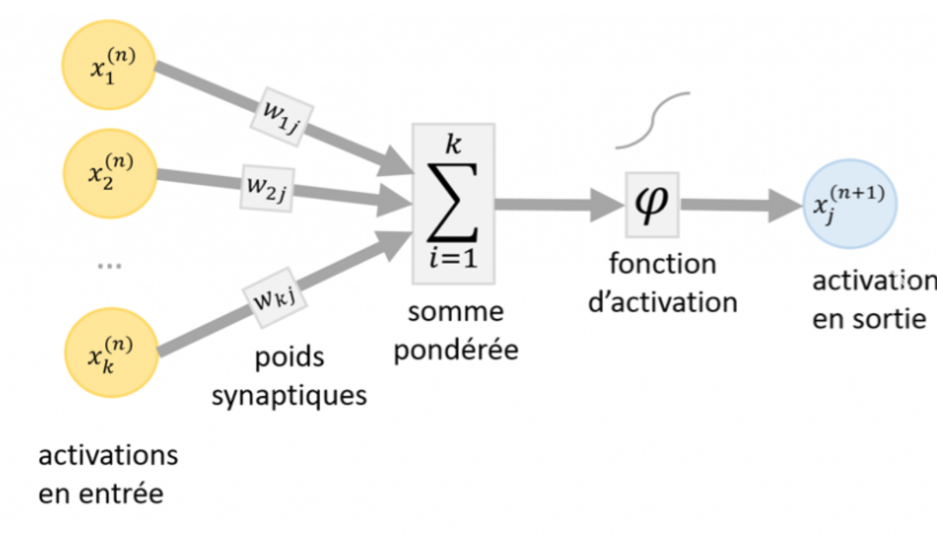

In [2]:
from IPython.display import Image
Image(filename='../pictures/PerceptronSimple.png', width=500, height=20)

## Plusieurs perceptron Simple

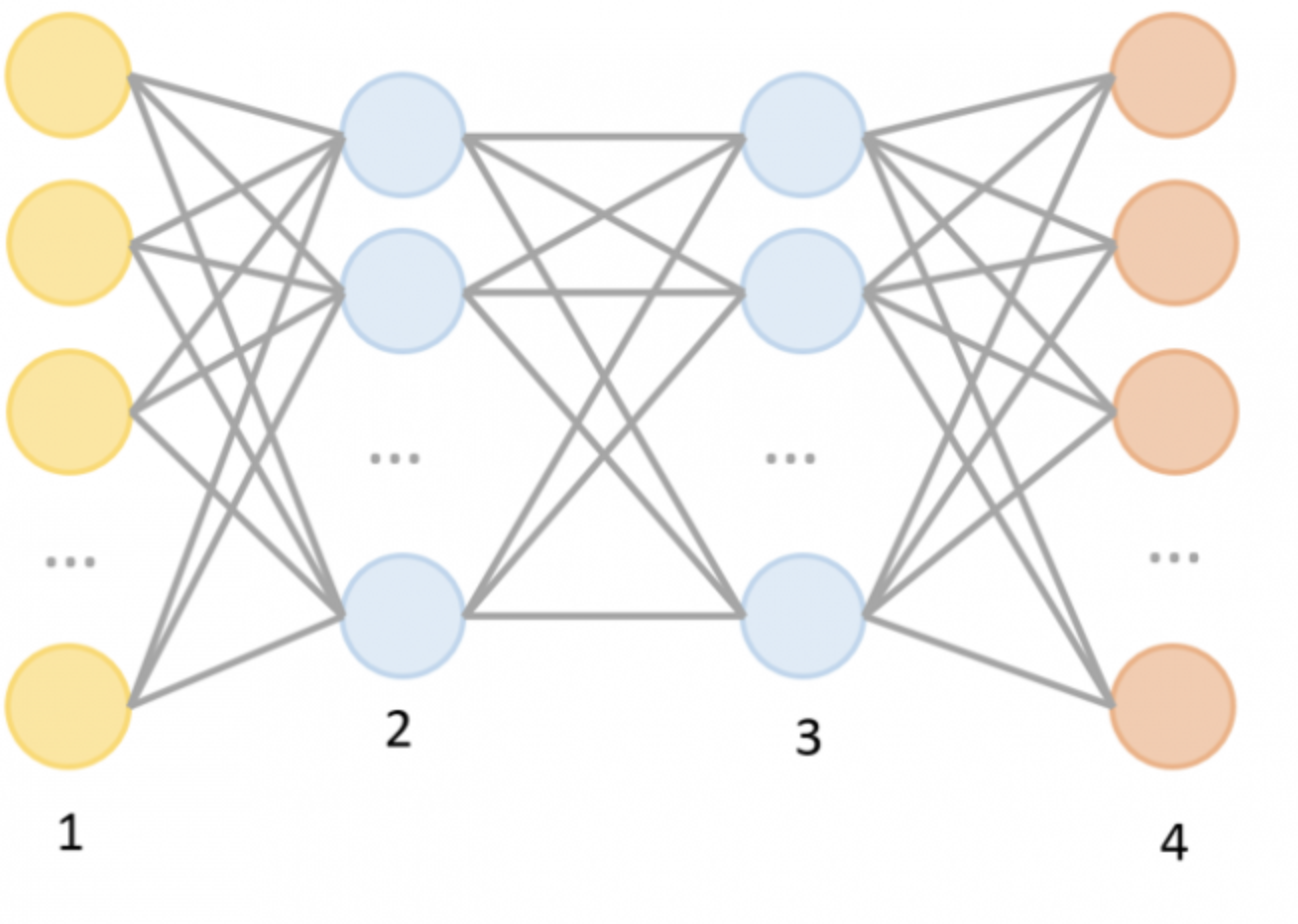

In [3]:
from IPython.display import Image
Image(filename='../pictures/MLP.png', width=500, height=20)

# Déclaration et préparation des données d'entrainement

## charge et prépare le dataset

In [4]:
# load and prépare dataset
# Charge et prépare le dataset
dataset = numpy.genfromtxt("../dataset/Concrete_Data_Yeh.csv", delimiter=",",skip_header=1)
readData = pd.read_csv("../dataset/Concrete_Data_Yeh.csv", delimiter=",")
readData.head()

cement   slag  flyash  water  superplasticizer  coarseaggregate  \
0   540.0    0.0     0.0  162.0               2.5           1040.0   
1   540.0    0.0     0.0  162.0               2.5           1055.0   
2   332.5  142.5     0.0  228.0               0.0            932.0   
3   332.5  142.5     0.0  228.0               0.0            932.0   
4   198.6  132.4     0.0  192.0               0.0            978.4   

   fineaggregate  age  csMPa  
0          676.0   28  79.99  
1          676.0   28  61.89  
2          594.0  270  40.27  
3          594.0  365  41.05  
4          825.5  360  44.30

## Preprocessing

In [5]:
#Input
X = dataset[:,0:8]

#Normalization of data
# Create a minimum and maximum processor object
min_max_scaler = preprocessing.MinMaxScaler()

# Create an object to transform the data to fit minmax processor
x_scaled = min_max_scaler.fit_transform(X)

# Run the normalizer on the dataframe
X = pd.DataFrame(x_scaled)

# View the dataframe
X

0         1         2         3         4         5         6  \
0     1.000000  0.000000  0.000000  0.321086  0.077640  0.694767  0.205720   
1     1.000000  0.000000  0.000000  0.321086  0.077640  0.738372  0.205720   
2     0.526256  0.396494  0.000000  0.848243  0.000000  0.380814  0.000000   
3     0.526256  0.396494  0.000000  0.848243  0.000000  0.380814  0.000000   
4     0.220548  0.368392  0.000000  0.560703  0.000000  0.515698  0.580783   
5     0.374429  0.317195  0.000000  0.848243  0.000000  0.380814  0.190667   
6     0.634703  0.264329  0.000000  0.848243  0.000000  0.380814  0.000000   
7     0.634703  0.264329  0.000000  0.848243  0.000000  0.380814  0.000000   
8     0.374429  0.317195  0.000000  0.848243  0.000000  0.380814  0.190667   
9     0.851598  0.000000  0.000000  0.848243  0.000000  0.380814  0.000000   
10    0.220548  0.368392  0.000000  0.560703  0.000000  0.515698  0.580783   
11    0.220548  0.368392  0.000000  0.560703  0.000000  0.515698  0.580783   
12    0.743151  0.132165  0.000000  0.848243  0.000000  0.380814  0.000000   
13    0.200913  0.528659  0.000000  0.848243  0.000000  0.380814  0.190667   
14    0.461187  0.211464  0.000000  0.848243  0.000000  0.380814  0.190667   
15    0.634703  0.000000  0.000000  0.848243  0.000000  0.380814  0.190667   
16    0.085845  0.582638  0.000000  0.560703  0.000000  0.715116  0.534119   
17    0.547945  0.105732  0.000000  0.848243  0.000000  0.380814  0.190667   
18    0.634703  0.264329  0.000000  0.848243  0.000000  0.380814  0.000000   
19    0.851598  0.000000  0.000000  0.848243  0.000000  0.380814  0.000000   
20    0.743151  0.132165  0.000000  0.848243  0.000000  0.380814  0.000000   
21    0.085845  0.582638  0.000000  0.560703  0.000000  0.715116  0.534119   
22    0.085845  0.582638  0.000000  0.560703  0.000000  0.715116  0.534119   
23    0.085845  0.582638  0.000000  0.560703  0.000000  0.715116  0.534119   
24    0.634703  0.000000  0.000000  0.848243  0.000000  0.380814  0.190667   
25    0.634703  0.000000  0.000000  0.848243  0.000000  0.380814  0.190667   
26    0.634703  0.264329  0.000000  0.848243  0.000000  0.380814  0.000000   
27    0.547945  0.105732  0.000000  0.848243  0.000000  0.380814  0.190667   
28    0.743151  0.132165  0.000000  0.848243  0.000000  0.380814  0.000000   
29    0.851598  0.000000  0.000000  0.848243  0.000000  0.380814  0.000000   
...        ...       ...       ...       ...       ...       ...       ...   
1000  0.091096  0.463550  0.648176  0.412939  0.338509  0.237209  0.479930   
1001  0.447032  0.381747  0.534233  0.634984  0.186335  0.225000  0.153788   
1002  0.500685  0.456873  0.000000  0.548722  0.142857  0.200581  0.451581   
1003  0.602740  0.520312  0.000000  0.555112  0.204969  0.067733  0.408680   
1004  0.405936  0.358653  0.501749  0.404153  0.295031  0.070058  0.529102   
1005  0.342694  0.270173  0.377811  0.575080  0.257764  0.100291  0.570497   
1006  0.142922  0.000000  0.751624  0.477636  0.363354  0.646221  0.338435   
1007  0.122374  0.677518  0.000000  0.467252  0.332298  0.642442  0.260161   
1008  0.132877  0.523094  0.731634  0.650160  0.350932  0.080523  0.290266   
1009  0.447717  0.000000  0.534733  0.515974  0.189441  0.226744  0.554942   
1010  0.492922  0.000000  0.632184  0.702077  0.177019  0.172965  0.357752   
1011  0.423059  0.335281  0.469265  0.525559  0.285714  0.300581  0.255645   
1012  0.510502  0.462994  0.000000  0.416933  0.276398  0.234302  0.491721   
1013  0.579680  0.000000  0.707646  0.571086  0.341615  0.001163  0.462619   
1014  0.068493  0.574569  0.804098  0.456070  0.170807  0.191570  0.355243   
1015  0.503425  0.413467  0.000000  0.511182  0.263975  0.436047  0.289764   
1016  0.142009  0.000000  1.000000  0.474441  0.391304  0.140407  0.632213   
1017  0.483562  0.000000  0.562719  0.384185  0.313665  0.361337  0.473909   
1018  0.500913  0.000000  0.639180  0.484824  0.357143  0.200872  0.465881   
1019  0.086073  0.456038  0.638181 

In [6]:
#OutPut predict
Y = dataset[:,8]
Y

array([79.99, 61.89, 40.27, ..., 23.7 , 32.77, 32.4 ])

### Découpage pour équibrer le training et test

In [7]:
#http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html

#decoupage facon equilibré par rapport a y 
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=0.5,random_state=40)

In [8]:
print(len(X))#taille de X
print(len(X_test))#taille test 30%
print(len(X_train))#taille d'entrainment 70%

1030
515
515


In [9]:
#X_train

In [ ]:
#X_test

In [ ]:
#Y_train

In [ ]:
#Y_test

## 1. Defini le réseau

In [10]:
# create model
model = Sequential()

In [11]:
#The first layer,8 input variables
#initialize the network weights to a small random number generated from :
# uniform : in this case between 0 and 0.05 because that is the default uniform weight initialization in Keras
# normal : for small random numbers generated from a Gaussian distribution.

model.add(Dense(4, input_dim=8, kernel_initializer='normal', activation='tanh'))

In [12]:
#model.add(Dropout(0.5))

In [13]:
#second hidden layer has 8 neurons
model.add(Dense(8, kernel_initializer='normal', activation='tanh'))

In [14]:
#3 hidden layer has 8 neurons
#model.add(Dense(8, kernel_initializer='normal', activation='sigmoid'))

In [15]:
#model.add(Dropout(0.5))

In [16]:
#output layer has 1 neuron
model.add(Dense(1, activation='linear'))

## 2. compile le réseau

In [17]:
model.compile(loss='mse', optimizer='sgd',metrics=['accuracy'])

#Régression : erreur quadratique moyenne ou « MSE ».
#Stochastique Descente du Gradient ou « sgd » qui nécessite la mise au point d'un taux d'apprentissage et dynamique.
#ADAM ou « adam » qui nécessite le réglage de la vitesse d'apprentissage.
#RMSprop ou « rmsprop » qui nécessite le réglage de la vitesse d'apprentissage.

## 3. construit le réseau

In [18]:
experiment_id = "3_Layer_MLP_1000_tanh_surapp2/"
tb_callback = keras.callbacks.TensorBoard('./logs/' + experiment_id)

In [19]:
# Fit the model
# Construction du modele
model.fit(X_train,Y_train, epochs=1000, verbose=0, callbacks = [tb_callback])

## 4. evalue le réseau

In [20]:
#evaluate the network
loss, accuracy = model.evaluate(X_train, Y_train)
print("\nLoss: %.2f, Accuracy: %.2f%%" % (loss, accuracy*100))

515/515 [==============================] - 0s 69us/step

Loss: 270.45, Accuracy: 0.00%


## 5. Prédiction

In [21]:
probabilities = model.predict(X_test)
diff = [len(Y_test)]
# round predictions
# show the inputs and predicted outputs
for i in range(len(Y_test)):
    print("Y=%s, Predicted=%s" % (Y_test[i], probabilities[i]))
    diff.append(abs((probabilities[i] - Y_test[i]) / Y_test[i] * 100))

Y=11.47, Predicted=[34.423916]
Y=32.66, Predicted=[34.42392]
Y=40.86, Predicted=[34.42392]
Y=31.9, Predicted=[34.42392]
Y=44.21, Predicted=[34.42392]
Y=74.5, Predicted=[34.42392]
Y=12.46, Predicted=[34.423912]
Y=47.81, Predicted=[34.42392]
Y=79.99, Predicted=[34.423923]
Y=59.76, Predicted=[34.423927]
Y=51.86, Predicted=[34.42392]
Y=11.98, Predicted=[34.423916]
Y=49.2, Predicted=[34.42392]
Y=35.23, Predicted=[34.423912]
Y=40.23, Predicted=[34.42392]
Y=50.08, Predicted=[34.42392]
Y=39.38, Predicted=[34.423923]
Y=21.95, Predicted=[34.423916]
Y=56.63, Predicted=[34.42392]
Y=82.6, Predicted=[34.423927]
Y=64.3, Predicted=[34.42392]
Y=10.03, Predicted=[34.423916]
Y=59.49, Predicted=[34.42392]
Y=13.52, Predicted=[34.423916]
Y=15.62, Predicted=[34.423912]
Y=33.54, Predicted=[34.423916]
Y=37.43, Predicted=[34.42392]
Y=20.73, Predicted=[34.423912]
Y=32.82, Predicted=[34.42392]
Y=33.76, Predicted=[34.423912]
Y=4.57, Predicted=[34.423897]
Y=12.45, Predicted=[34.423912]
Y=38.46, Predicted=[34.42392]

In [22]:
diff

[515,
 array([200.1213], dtype=float32),
 array([5.400857], dtype=float32),
 array([15.751544], dtype=float32),
 array([7.911975], dtype=float32),
 array([22.135445], dtype=float32),
 array([53.793396], dtype=float32),
 array([176.27539], dtype=float32),
 array([27.998499], dtype=float32),
 array([56.964714], dtype=float32),
 array([42.396374], dtype=float32),
 array([33.62144], dtype=float32),
 array([187.34488], dtype=float32),
 array([30.032686], dtype=float32),
 array([2.2880712], dtype=float32),
 array([14.432214], dtype=float32),
 array([31.262144], dtype=float32),
 array([12.585266], dtype=float32),
 array([56.828766], dtype=float32),
 array([39.212574], dtype=float32),
 array([58.32454], dtype=float32),
 array([46.463577], dtype=float32),
 array([243.20955], dtype=float32),
 array([42.13495], dtype=float32),
 array([154.61476], dtype=float32),
 array([120.383575], dtype=float32),
 array([2.6354053], dtype=float32),
 array([8.031206], dtype=float32),
 array([66.05843], dtype=flo

## 6. Comparaison Train et Predict

In [23]:
moyen = sum(diff) / float(len(diff))

In [24]:
moyen

array([52.456284], dtype=float32)